## Artificial Neural Network

Situation: I want to predict the score on a test based on how many hours you sleep and how many hours you study the night before. Let’s say for the last three tests, you recorded your number of hours of studying, your number of hours sleeping, and your score on the test. I will use Python to store the data in 2-dimensional numpy arrays.

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float) # X = (hours sleeping, hours studying)
y = np.array(([75], [82], [93]), dtype=float) # y = Score on test

In [5]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [6]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

In [7]:
# Normalize the data
X = X/np.amax(X, axis=0)
y = y/100 

In [8]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [9]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

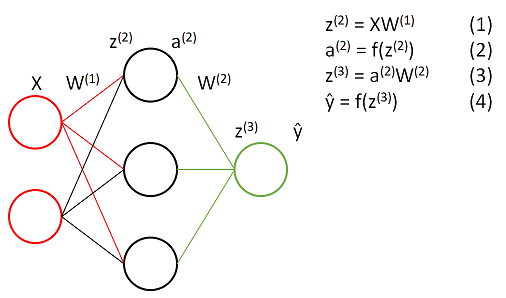

In [11]:
from IPython.display import Image
i = Image(filename='/Users/Sony/Desktop/Python/ANN/simpleNetwork.png')
i

Our network has 2 inputs, 3 hidden units, and 1 output.

In [13]:
print X.shape, y.shape # Show the dimension of X and y

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-13-eb8f84242830>, line 1)

In [14]:
class Neural_Network(object):
    def __init__(self): # Define Hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1

We are using a sigmoid as our activation function.

$$a^{(2)}=f(z^{(2)}) = 1/(1+e^{-z^{(2)}})$$

$$\hat{y} = f(z^{(3)}) = 1/(1+e^{-z^{(3)}})$$

In [15]:
# Apply sigmoid activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

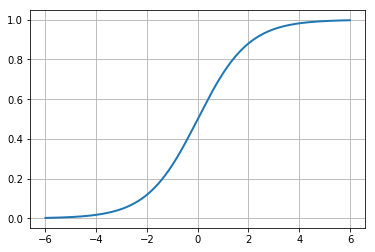

In [16]:
# Test the function
testInput = np.arange(-6,6,0.01)
plot(testInput, sigmoid(testInput), linewidth= 2)
grid(1)

Use f to denote our activation function.

$$a^{(2)}=f(z^{(2)}) = 1/(1+e^{-z^{(2)}})$$

W2 will be of size 3 by 1, one weight for each synapse. Multiplying a2 by W2, results in a 3 by 1 matrix z three, the activity of our third layer.

$$z^{(3)} = a^{(2)}*W^{(2)}$$

Last but not least, we'll apply our activation function to z three yielding our official estimate of your test score, yHat.

$$\hat{y} = f(z^{(3)}) = 1/(1+e^{-z^{(3)}})$$

In [18]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize) # Assign random number for W1
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize) # Assign random number for W2
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

First we will initialize our weight matrices in our init method. For starting values, we will use random numbers. We will implement forward propagation, using numpy's built in dot method for matrix multiplication and our own sigmoid method.

In [19]:
NN = Neural_Network()

In [20]:
yHat = NN.forward(X)

In [21]:
yHat

array([[ 0.04745063],
       [ 0.07538147],
       [ 0.06367774]])

In [22]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

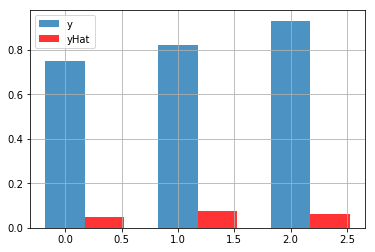

In [23]:
#Compare estimate, yHat, to actually score
bar([0,1,2], y, width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],yHat, width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['y', 'yHat'])

You may notice that our estimates are quite terrible. That's because we have not yet trained our network.

To improve our model, we first need to quantify exactly how wrong our predictions are. We'll do this with a cost function. A cost function allows us to express exactly how wrong or "costly" our models is, given our examples.

One way to compute an overall cost is to take each error value, square it, and add these values together. Multiplying by one half will make things simpler down the road. Now that we have a cost, or job is to minimize it.

$$J = \sum \frac{1}{2}(y-\hat{y})^2$$

We will minimize our cost by changing the weights.

We have a collection of 9 individual weights, and there are some combinations of w's that will make our cost, J, as small as possible.

Let's pretend for a second that we only have 1 weight, instead of 9. To find the ideal value of our weight that will minimize our cost, we need to try a bunch of values for W, let's say we test 1000 values.

In [24]:
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()

In [25]:
timeElapsed = endTime-startTime
timeElapsed

0.03962051614525555

It takes about 0.04 seconds to check 1000 different weight values for our neural network.

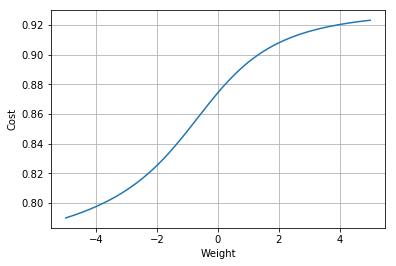

In [26]:
plot(weightsToTry, costs)
grid(1)
ylabel('Cost')
xlabel('Weight')

Let's pretend for a second that we only have 1 weight, instead of 9. To find the ideal value of our weight that will minimize our cost, we need to try a bunch of values for W, let's say we test 1,000,000 values.

In [27]:
weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros((1000, 1000))

startTime = time.clock()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weightsToTry[i]
        NN.W1[0,1] = weightsToTry[j]
        yHat = NN.forward(X)
        costs[i, j] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()

In [28]:
timeElapsed = endTime-startTime
timeElapsed

24.5834846518932

It takes about 25 seconds to check 1,000,000 different weight values for our neural network. Therefore, Forward Propagation may not be the most efficient approach to minimize the cost (J).

$$z^{(2)} = XW^{(1)}$$

$$a^{(2)} = f(z^{(2)})$$

$$z^{(3)} = a^{(2)}W^{(2)}$$

$$\hat{y} = f(z^{(3)})$$

$$J = \sum \frac{1}{2}(y-\hat{y})^2$$

We have 5 equations, but we can really think of them as one big equation that uniquely determines our cost, J, from X, y, W1, and W2.

We want to know "which way is downhill", that is, what is the rate of change of J with respect to W, also known as the derivative. And in this case, since we’re just considering one weight at a time, the partial derivative.

We can derive an expression for dJdW, that will give us the rate of change of J with respect to W, for any value of W! If dJdW is positive, then the cost function is going uphill. If dJdW is negative the cost function is going downhill.

$$\frac{\partial J}{\partial W^{(2)}} = \frac{\partial \sum \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}$$

We can move our sigma outside and just worry about the derivative of the inside expression first.

$$\frac{\partial J}{\partial W^{(2)}} = \sum \frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}$$

To keep things simple, we’ll temporarily forget about our summation. Once we’ve computed dJdW for a single example, we’ll add all our individual derivative terms together.

$$\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y}) \frac{\partial \hat{y}}{\partial W^{(2)}}$$

Apply the chain rule.

$$\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y})\frac{\partial \hat{y}}{\partial z^{(3)}}\frac{\partial z^{(3)}}{\partial W^{(2)}}$$

To find the rate of change of yHat with respect to z3, we need to differentiate our sigmoid activation function with respect to z.

$$f(z) = \frac{1}{1+e^{-z}}$$

$$f^\prime(z) = \frac{e^{-z}}{(1+e^{-z})^2}$$

Now is a good time to add a new python method for the derivative of our sigmoid function, sigmoid Prime. Our derivative should be the largest where our sigmoid function is the steepest, at the value z equals zero.

In [1]:
def sigmoid(z):
    return 1/(1+np.exp(-z)) #Apply sigmoid activation function

In [2]:
def sigmoidPrime(z):
    return np.exp(-z)/((1+np.exp(-z))**2) #Derivative of sigmoid function

In [3]:
testValues = np.arange(-5,5,0.01)
plot(testValues, sigmoid(testValues), linewidth=2)
plot(testValues, sigmoidPrime(testValues), linewidth=2)
grid(1)
legend(['sigmoid', 'sigmoidPrime'])

NameError: name 'np' is not defined

Recall the equation:

$$\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y})\frac{\partial \hat{y}}{\partial z^{(3)}}\frac{\partial z^{(3)}}{\partial W^{(2)}}$$

We can now replace dyHat/dz3 with f prime of z 3.

$$\frac{\partial J}{\partial W^{(2)}}= -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(2)}}$$

Recall the equation:

$$z^{(3)} = a^{(2)}W^{(2)}$$

Assign a new variable delta 3:

$$\delta^{(3)} = -(y-\hat{y}) f^\prime(z^{(3)})$$

Then, a new equation is formed:

$$\frac{\partial J}{\partial W^{(2)}} = (a^{(2)})^T\delta^{(3)}$$

We’ll code up our gradients in python in a new method, cost function prime. Numpy’s multiply method performs element-wise multiplication, and the dot method performs matrix multiplication.

In [33]:
def costFunctionPrime(self, X, y):
    self.yHat = self.forward(X) #Compute derivative with respect to W and W2 for a given X and y:

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)

We have one final term to compute: dJ/dW1. The derivation begins the same way:

$$\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})\frac{\partial \hat{y}}{\partial W^{(1)}}$$

$$\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})\frac{\partial \hat{y}}{\partial z^{(3)}}\frac{\partial z^{(3)}}{\partial W^{(1)}}$$

$$\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(1)}}$$

Apply chain rule:

$$\frac{\partial z^{(3)}}{\partial W^{(1)}} = \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}$$

then:

$$\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}$$

There’s still a nice linear relationship along each synapse, but now we’re interested in the rate of change of z(3) with respect to a(2). Now the slope is just equal to the weight value for that synapse. We can achieve this mathematically by multiplying by W(2) transpose.

Recall the equations:

$$z^{(3)} = a^{(2)}W^{(2)}$$

$$\delta^{(3)} = -(y-\hat{y}) f^\prime(z^{(3)})$$

Therefore:

$$\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}$$

$$\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}$$

$$\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)}(W^{(2)})^{T}\frac{\partial a^{(2)}}{\partial W^{(1)}}$$

Apply chain rule:

$$\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} (W^{(2)})^{T}\frac{\partial a^{(2)}}{\partial z^{(2)}}\frac{\partial z^{(2)}}{\partial W^{(1)}}$$

Our next term to work on is da(2)/dz(2) – this step is just like the derivative across our layer 3 neurons, so we can just multiply by f prime(z2).

$$\frac{\partial a^{(2)}}{\partial z^{(2)}} = f^\prime(z^{(2)})$$

$$\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} (W^{(2)})^{T}f^\prime(z^{(2)})\frac{\partial z^{(2)}}{\partial W^{(1)}}$$

Our final computation here is dz2/dW1. This is very similar to our dz3/dW2 computation, there is a simple linear relationship on the synapses between z2 and w1, in this case though, the slope is the input value, X. We can use the same technique as last time by multiplying by X transpose, effectively applying the derivative and adding our dJ/dW1’s together across all our examples.



$$\frac{\partial J}{\partial W^{(1)}} = X^{T}\delta^{(3)} (W^{(2)})^{T}f^\prime(z^{(2)})$$

AND

$$\frac{\partial J}{\partial W^{(2)}} = (a^{(2)})^T\delta^{(3)}$$

All that’s left is to code this equation up in python. What’s cool here is that if we want to make a deeper neural network, we could just stack a bunch of these operations together.

In [4]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

So how should we change our W’s to decrease our cost? We can now compute dJ/dW, which tells us which way is uphill in our 9 dimensional optimization space.

In [35]:
NN = Neural_Network()

In [36]:
cost1 = NN.costFunction(X,y)

In [37]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [38]:
dJdW1

array([[ 0.0012506 , -0.0001376 , -0.01550042],
       [ 0.00084288, -0.00012317, -0.01068035]])

In [39]:
dJdW2

array([[-0.18563281],
       [-0.06264146],
       [-0.05437683]])

If we move this way by adding a scalar times our derivative to our weights, our cost will increase, and if we do the opposite, subtract our gradient from our weights, we will move downhill and reduce our cost. This simple step downhill is the core of gradient descent and a key part of how even very sophisticated learning algorithms are trained.

In [40]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [41]:
print cost1, cost2

0.151981707848 0.302274957549


In [42]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [43]:
print cost2, cost3

0.302274957549 0.110888012511


Last time, we did a bunch of calculus to find the rate of change of our cost, J, with respect to our parameters, W. Although each calculus step was pretty straight forward, it’s still easy to make mistakes. What’s worse, is that our network doesn’t have a good way to tell us that it’s broken – code with incorrectly implemented gradients may appear to be functioning just fine.

This is the most nefarious kind of error when building complex systems. Big, in-your-face errors suck initially, but it’s clear that you must fix this error for your work to succeed. More subtle errors can be more troublesome because they hide in your code and steal hours of your time, slowly degrading performance, while you wonder what the problem is.

A good solution here is to test the gradient computation part of our code, just as developer would unit test new portions of their code. We’ll combine a simple understanding of the derivative with some mild cleverness to perform numerical gradient checking. If our code passes this test, we can be quite confident that we have computed and coded up our gradients correctly.

To get started, let’s quickly review derivatives. Derivates tell us the slope, or how steep a function is. Once you’re familiar with calculus, it’s easy to take for granted the inner workings of the derivative - we just accept that the derivative of x^2 is 2x by the power rule. However, depending on how mean your calculus teacher was, you may have spent months not being taught the power rule, and instead required to compute derivatives using the definition. Taking derivatives this way is a bit tedious, but still important - it provides us a deeper understanding of what a derivative is, and it’s going to help us solve our current problem.

The definition of the derivative is really a glorified slope formula. The numerator gives us the change in y values, while the denominator is convenient way to express the change in x values. By including the limit, we are applying the slope formula across an infinitely small region – it’s like zooming in on our function, until it becomes linear.

The definition tells us to zoom in until our x distance is infinitely small, but computers can’t really handle infinitely small numbers, especially when they’re in the bottom parts of fractions - if we try to plug in something too small, we will quickly lose precision. The good news here is that if we plug in something reasonable small, we can still get surprisingly good numerical estimates of the derivative.

We’ll modify our approach slightly by picking a point in the middle of the interval we would like to test, and call the distance we move in each direction epsilon.

Let’s test our method with a simple function, x squared. We’ll choose a reasonable small value for epsilon, and compute the slope of x^2 at a given point by finding the function value just above and just below our test point. We can then compare our result to our symbolic derivative 2x, at the test point. If the numbers match, we’re in business!

In [44]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

We can use the same approach to numerically evaluate the gradient of our neural network. It’s a little more complicated this time, since we have 9 gradient values, and we’re interested in the gradient of our cost function. We’ll make things simpler by testing one gradient at a time. We’ll “perturb” each weight - adding epsilon to the current value and computing the cost function, subtracting epsilon from the current value and computing the cost function, and then computing the slope between these two values.

In [45]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad

We’ll repeat this process across all our weights, and when we’re done we’ll have a numerical gradient vector, with the same number of values as we have weights. It’s this vector we would like to compare to our official gradient calculation. We see that our vectors appear very similar, which is a good sign, but we need to quantify just how similar they are.

In [46]:
NN = Neural_Network()

In [47]:
numgrad = computeNumericalGradient(NN, X, y)
numgrad

array([ 0.02404309,  0.03689333,  0.01958915,  0.01960075,  0.03605687,
        0.02004135, -0.13601367, -0.14868643, -0.04567078])

In [48]:
grad = NN.computeGradients(X,y)
grad

array([ 0.02404309,  0.03689333,  0.01958915,  0.01960075,  0.03605687,
        0.02004135, -0.13601367, -0.14868643, -0.04567078])

A nice way to do this is to divide the norm of the difference by the norm of the sum of the vectors we would like to compare. Typical results should be on the order of 10^-8 or less if you’ve computed your gradient correctly.

In [49]:
norm(grad-numgrad)/norm(grad+numgrad)

7.9623471441546374e-11

And that’s it, we can now check our computations and eliminate gradient errors before they become a problem.

So far we’ve built a neural network in python, computed a cost function to let us know how well our network is performing, computed the gradient of our cost function so we can train our network, and last time we numerically validated our gradient computations. After all that work, it’s finally time to train our neural network.

Back in part 3, we decided to train our network using gradient descent. While gradient descent is conceptually pretty straight forward, its implementation can actually be quite complex- especially as we increase the size and number of layers in our neural network. If we just march downhill with consistent step sizes, we may get stuck in a local minimum or flat spot, we may move too slowly and never reach our minimum, or we may move to quickly and bounce out of our minimum. And remember, all this must happen in high-dimensional space, making things significantly more complex. Gradient descent is a wonderfully clever method, but provides no guarantees that we will converge to a good solution, that we will converge to a solution in a certain amount of time, or that we will converge to a solution at all.

The good and bad news here is that this problem is not unique to Neural Networks - there’s an entire field dedicated to finding the best combination of inputs to minimize the output of an objective function: the field of Mathematical Optimization. The bad news is that optimization can be a bit overwhelming; there are many different techniques we could apply to our problem.
Part of what makes the optimization challenging is the broad range of approaches covered - from very rigorous, theoretical methods to hands-on, more heuristics-driven methods. Yann Lecun’s 1998 publication Efficient BackProp presents an excellent review of various optimization techniques as applied to neural networks.

Here, we’re going to use a more sophisticated variant on gradient descent, the popular Broyden-Fletcher-Goldfarb-Shanno numerical optimization algorithm. The BFGS algorithm overcomes some of the limitations of plain gradient descent by estimating the second derivative, or curvature, of the cost function surface, and using this information to make more informed movements downhill. BFGS will allow us to find solutions more often and more quickly.

We’ll use the BFGS implementation built into the scipy optimize package, specifically within the minimize function. To use BFGS, the minimize function requires us to pass in an objective function that accepts a vector of parameters, input data, and output data, and returns both the cost and gradients. Our neural network implementation doesn’t quite follow these semantics, so we’ll use a wrapper function to give it this behavior. We’ll also pass in initial parameters, set the jacobian parameter to true since we’re computing the gradient within our neural network class, set the method to BFGS, pass in our input and output data, and some options. Finally, we’ll implement a callback function that allows us to track the cost function value as we train the network. Once the network is trained, we’ll replace the original, random parameters, with the trained parameters.

In [50]:
from scipy import optimize

In [51]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

If we plot the cost against the number of iterations through training, we should see a nice, monotonically decreasing function. Further, we see that the number of function evaluations required to find the solution is less than 100, and far less than the 10^27 function evaluation that would have been required to find a solution by brute force, as shown in part 3. Finally, we can evaluate our gradient at our solution and see very small values – which make sense, as our minimum should be quite flat.

In [52]:
NN = Neural_Network()

In [53]:
T = trainer(NN)

In [54]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 66
         Gradient evaluations: 66


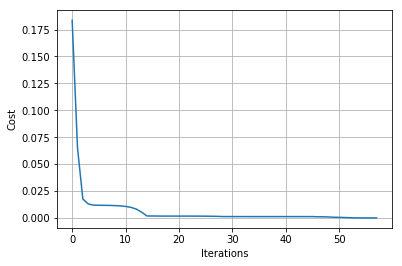

In [55]:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [56]:
NN.costFunctionPrime(X,y)

(array([[ -2.95697159e-06,   9.35029916e-07,  -4.46921577e-06],
        [ -1.42405496e-06,   6.24066204e-07,  -2.09768747e-06]]),
 array([[ -6.82224656e-06],
        [ -9.14530992e-06],
        [ -7.31553171e-06]]))

The more exciting thing here is that we finally have a trained network that can predict your score on a test based on how many hours you sleep and how many hours you study the night before. If we run our training data through our forward method now, we see that our predictions are excellent. We can go one step further and explore the input space for various combinations of hours sleeping and hours studying, and maybe we can find an optimal combination of the two for your next test.

In [57]:
NN.forward(X)

array([[ 0.74999797],
       [ 0.81993797],
       [ 0.92999955]])

In [58]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [59]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [60]:
allOutputs = NN.forward(allInputs)

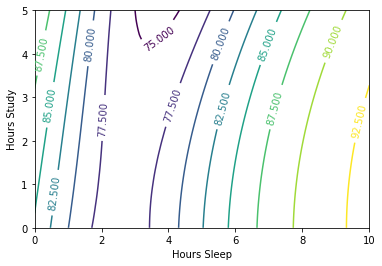

In [61]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

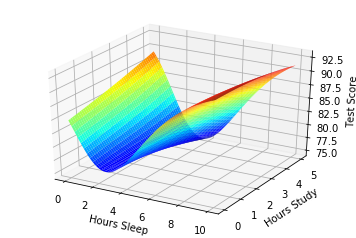

In [62]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

Our results look pretty reasonable, and we see that for our model, sleep actually has a bigger impact on your grade than studying – something I wish I had realized when I was in school. So we’re done, right? Nope.

We’ve made possibly the most dangerous and tempting error in machine learning – overfitting. Although our network is performing incredibly well (maybe too well) on our training data – that doesn’t mean that our model is a good fit for the real world.

we trained our Neural Network, and it made suspiciously good predictions of your test score based on how many hours you slept, and how many hours you studied the night before. Before we celebrate and begin changing our sleep and study habits, we need some way to ensure that our model reflects the real world.

To do this, let’s first spend some time thinking about data. Like a lot of data, our input and output values come from real world observations. The assumption here is that there is some underlying process, and our observations give us insight into the process - BUT our observations are not the same thing as the process, they are just a sample.

Our observation says that when we sleep for 3 hours and study for 5 hours, the grade we earned was a 75. But does this mean that every time you sleep for 3 hours and study for 5 hours you will earn a 75? Of course not, because there are other variables that matter here, such as the difficulty of test, or whether you’ve been paying attention in lectures – we could quantify these variables to build a better model, but even if we did, there would still an element of uncertainty that we could never explicitly model – for example, maybe the test was multiple choice, and you guessed on a few problems.

One way to think about this problem is that observations are composed of signal and noise. Nate Silver, the guy who correctly predicted the US election results for 50 out of 50 US states in 2012, wrote a great book on exactly this. The idea is that we’re interested in an underlying process, the signal, but in real data, our signal will always be obscured by some level of noise.

An interesting example of this shows up when comparing the SAT scores of students who take the SAT both Junior and Senior year. Right on the college board’s website it says: “The higher a student's scores as a junior, the more likely that student's subsequent scores will drop”. Why would this be? It seems like students who did well junior year would also do well senior year. We can make sense of this by considering that SAT scores are composed of a signal and a noise component – the signal being the underlying aptitude of the student, and the noise being other factors that effect test scores, basically if the student had a good day or not. Of the students who did well the first time, we expect a disproportionate number to have had a good day – and since having a good day is random, when these students have a regular or bad test day on their next test, their scores will go down.

So if we can convince our model to fit the signal and not the noise, we should be able to avoid overfitting. First, we’ll work on diagnosing overfitting, then we’ll work on fixing it. Last time we showed our model predictions across the input space for various combinations of hours sleeping and hours studying. We’ll add a couple more data points to make overfitting a bit more obvious and retrain our model on the new dataset. If we re-examine our predictions across our sample space, we begin to see some strange behavior. Neural networks are really powerful learning models, and we see here that all that power has been used to fit our data really closely – which creates a problem - our model is no longer reflective of the real world. According to our model, in some cases, studying more will actually push our score down, this seems unlikely - hopefully studying more will not decrease your score.

In [63]:
NN = Neural_Network()

In [64]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
y = np.array(([75], [82], [93], [70]), dtype=float)

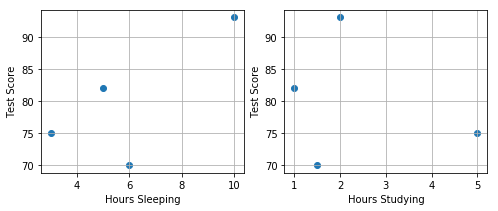

In [65]:
#Plot projections of our new data:
fig = figure(0,(8,3))

subplot(1,2,1)
scatter(X[:,0], y)
grid(1)
xlabel('Hours Sleeping')
ylabel('Test Score')

subplot(1,2,2)
scatter(X[:,1], y)
grid(1)
xlabel('Hours Studying')
ylabel('Test Score')

In [66]:
#Normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [67]:
#Train network with new data:
T = trainer(NN)
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 151
         Function evaluations: 172
         Gradient evaluations: 172


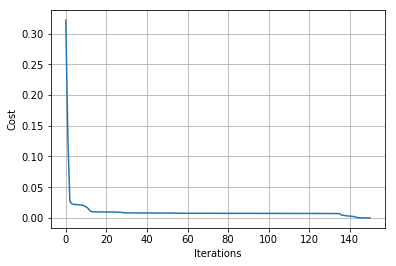

In [68]:
#Plot cost during training:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [69]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [70]:
allOutputs = NN.forward(allInputs)

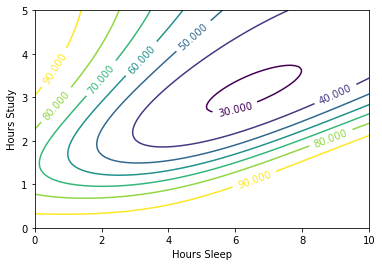

In [71]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

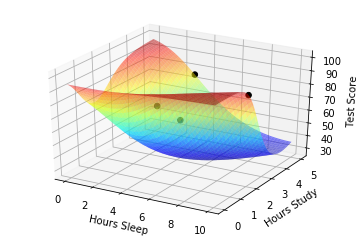

In [72]:
#3D plot:
#Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

#Scatter training examples:
ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)


ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

So it appears our model is overfitting, but how do we know for sure? A widely accepted method is to split our data into 2 portions: training and testing. We won’t touch our testing data while training the model, and only use it to see how we’re doing – our testing data is a simulation of the real world. We can plot the error on our training and testing sets as we train our model and identify the exact point at which overfitting begins. We can also plot testing and training error as a function of model complexity a see similar behavior.

In [73]:
#Training Data:
trainX = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
trainY = np.array(([75], [82], [93], [70]), dtype=float)

#Testing Data:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)

#Normalize:
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100 #Max test score is 100

#Normalize by max of training data:
testX = testX/np.amax(trainX, axis=0)
testY = testY/100 #Max test score is 100

In [74]:
##Need to modify trainer class a bit to check testing error during training:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [75]:
#Train network with new data:
NN = Neural_Network()

T = trainer(NN)
T.train(trainX, trainY, testX, testY)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 92
         Function evaluations: 104
         Gradient evaluations: 104


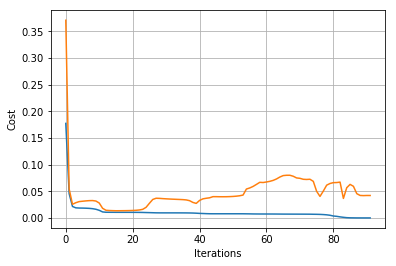

In [76]:
#Plot cost during training:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

So now that we know overfitting is a problem, but how do we fix it? One way is to throw more data at the problem. A simple rule of thumb as presented by Yaser Abu-Mostaf is his excellent machine learning course available from Caltech, is that you should have at least 10 times as many examples as the degrees for freedom in your model. For us, since we have 9 weights that can change, we would need 90 observations, which we certainly don’t have.

Another popular and effective way to mitigate overfitting is to use a technique called regularization. One way to implement regularization is to add a term to our cost function that penalizes overly complex models. A simple, but effective way to do this is to add together the square of our weights to our cost function, this way, models with larger magnitudes of weights, cost more. We’ll need to normalize the other part of our cost function to ensure that our ratio of the two error terms does not change with respect to the number of examples. We’ll introduce a regularization hyper parameter, lambda, that will allow us to tune the relative cost – higher values of lambda will impose bigger penalties for high model complexity.

In [77]:
#Regularization Parameter:
Lambda = 0.0001

In [78]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [79]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

If we train our model now, we see that the fit is still good, but our model is no longer interested in “exactly” fitting our data. Further, our training and testing errors are much closer, and we’ve successfully reduced overfitting on this dataset. To further reduce overfitting, we could increase lambda.

In [80]:
NN = Neural_Network(Lambda=0.0001)

In [81]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [82]:
#Should be less than 1e-8:
norm(grad-numgrad)/norm(grad+numgrad)

2.8168061289016434e-10

In [83]:
T = trainer(NN)

In [84]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.002618
         Iterations: 91
         Function evaluations: 97
         Gradient evaluations: 97


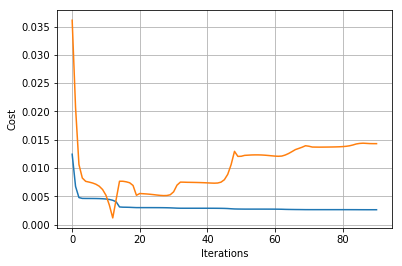

In [85]:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

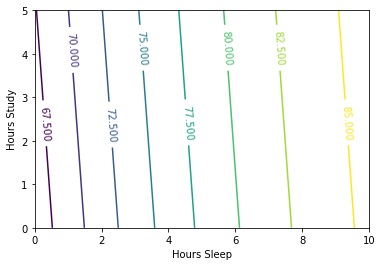

In [86]:
allOutputs = NN.forward(allInputs)

#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

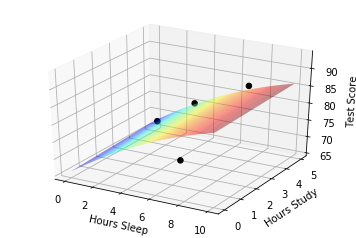

In [87]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

And that’s it, we’ve trained and evaluated an Artificial Neural Network to predict your score on a test based on how many hours you’ve slept and studied the night before.